In [23]:
# handling data
import numpy as np
import pandas as pd

# plotting functions
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

comments:

Nice job Aidan - you've made incredible progress! I have reviewed your work and figured it'd be easier to show rather than tell. See below. Check out the table of contents addon: https://github.com/jupyterlab/jupyterlab-toc to improve navigation within your jupyter notebooks. Also, try changing cells to markdown type & type "# Header 1, ## Header 2', etc. without the quotations - you'll access header fonts to improve the formatting of your notebooks. The layout becomes really important with larger notebooks.

Again, nice job!

# Reading and cleaning data

In [43]:
all_qPCR_df = pd.read_excel('../data/qPCR telo data/REVISED Tel +Alb (both plates) 2019-08-05 13 Quantification Cq Results.xlsx',
                            # grabbing first sheet
                            sheet_name=1,
                            # skipping first row
                            skiprows=1,
                            # grabbing only columns of interest
                            usecols=[24, 25, 26,]
                           )

# renaming columns outright
all_qPCR_df.columns = ['Sample', 'telo means qPCR', 'SEM']
# enforce sample IDs as strings
all_qPCR_df['Sample'] = all_qPCR_df['Sample'].astype('str')

# dropping rows w/ any missing values 
all_qPCR_df.dropna(axis=0, inplace=True)

# dropping rows @ a few indices (don't remember why)
all_qPCR_df.drop([24, 47, 48], axis=0, inplace=True)

In [44]:
all_qPCR_df.head(3)

,Sample,telo means qPCR,SEM
0,SW1A,2.182028,0.083233
1,SW1B,1.964348,0.051942
2,SW1C,1.749799,0.068195


In [45]:
# defining functions to clean columns / make new columns

def change_sample_ID(row):
    if 'SW9C-2D' in row:
        row = 'SW9C'
        return row
    else:
        return row

def make_timepoint_col(row):
    if 'A' in row:
        row = '1 non irrad'
        return row
    elif 'B' in row:
        row = '3 B'
        return row
    elif 'C' in row:
        row = '4 C'
        return row
    else:
        pass
         
def make_patient_ID(row):
    if len(row) == 4:
        return row[2]
    elif len(row) == 5:
        return row[2:4]

In [46]:
# applying functions to yield new columns
all_qPCR_df['Sample'] = all_qPCR_df['Sample'].apply(lambda x: change_sample_ID(x))
all_qPCR_df['timepoint'] = all_qPCR_df['Sample'].apply(lambda x: make_timepoint_col(x))
all_qPCR_df['patient id'] = all_qPCR_df['Sample'].apply(lambda x: make_patient_ID(x))

all_qPCR_df['patient id'] = all_qPCR_df['patient id'].astype('str')
all_qPCR_df.drop(['Sample'], axis=1, inplace=True)

In [47]:
all_qPCR_df.head(3)

,telo means qPCR,SEM,timepoint,patient id
0,2.182028,0.083233,1 non irrad,1
1,1.964348,0.051942,3 B,1
2,1.749799,0.068195,4 C,1


In [48]:
# reordering columns to preference
cols = ['patient id', 'timepoint', 'telo means qPCR', 'SEM']
all_qPCR_df = all_qPCR_df.reindex(columns=cols)
all_qPCR_df.head(3)

,patient id,timepoint,telo means qPCR,SEM
0,1,1 non irrad,2.182028,0.083233
1,1,3 B,1.964348,0.051942
2,1,4 C,1.749799,0.068195


# Visualizing patient id vs means

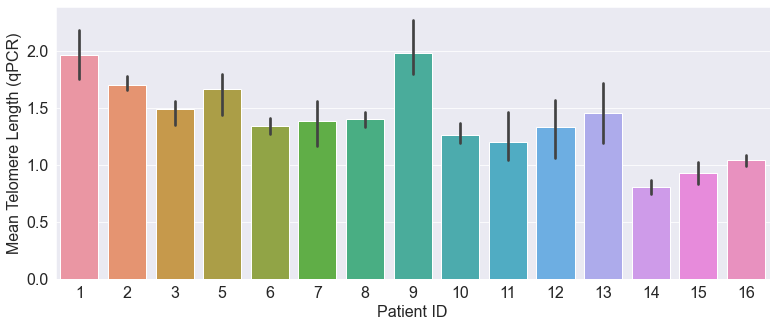

In [53]:
df =  all_qPCR_df.copy()
df['patient id'] = df['patient id'].astype('int64').sort_values(ascending=True)

plt.figure(figsize=(12.8, 5))
ax = sns.barplot(x='patient id', y='telo means qPCR', data=df)

plt.xlabel('Patient ID', fontsize=16)
plt.ylabel('Mean Telomere Length (qPCR)', fontsize=16)
plt.tick_params(labelsize=16)

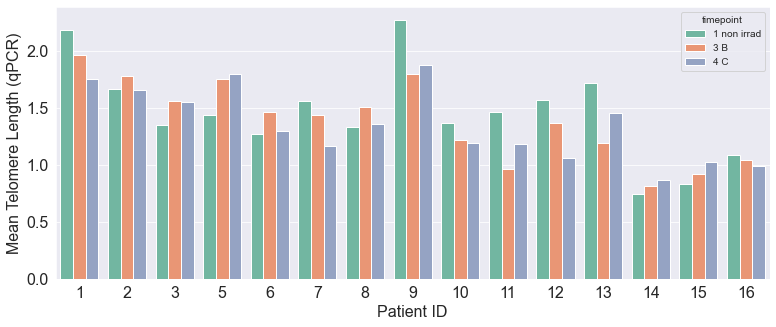

In [56]:
plt.figure(figsize=(12.8, 5))
ax = sns.barplot(x='patient id', y='telo means qPCR', hue='timepoint', palette='Set2', data=df)

plt.xlabel('Patient ID', fontsize=16)
plt.ylabel('Mean Telomere Length (qPCR)', fontsize=16)
plt.tick_params(labelsize=16)

In [50]:
all_qPCR_df.head(3)

,patient id,timepoint,telo means qPCR,SEM
0,1,1 non irrad,2.182028,0.083233
1,1,3 B,1.964348,0.051942
2,1,4 C,1.749799,0.068195


In [51]:
# note the indexing when slicing 
t1 = all_qPCR_df.iloc[0:3].copy()
t2 = all_qPCR_df.iloc[3:6].copy()
t3 = all_qPCR_df.iloc[6:9].copy()

for t in [t1, t2, t3]:
    display(t)

,patient id,timepoint,telo means qPCR,SEM
0,1,1 non irrad,2.182028,0.083233
1,1,3 B,1.964348,0.051942
2,1,4 C,1.749799,0.068195


,patient id,timepoint,telo means qPCR,SEM
3,2,1 non irrad,1.669445,0.034776
4,2,3 B,1.780092,0.066181
5,2,4 C,1.657974,0.018744


,patient id,timepoint,telo means qPCR,SEM
6,3,1 non irrad,1.354539,0.018292
7,3,3 B,1.557154,0.051560
8,3,4 C,1.552189,0.036392


In [37]:
pd.concat([t1, t2, t3], axis=0)

,patient id,timepoint,telo means qPCR,SEM
0,1,1 non irrad,2.182028,0.083233
1,1,3 B,1.964348,0.051942
2,1,4 C,1.749799,0.068195
3,2,1 non irrad,1.669445,0.034776
4,2,3 B,1.780092,0.066181
5,2,4 C,1.657974,0.018744
6,3,1 non irrad,1.354539,0.018292
7,3,3 B,1.557154,0.051560
8,3,4 C,1.552189,0.036392


# Reshaping data example

In [65]:
# dropping SEM column for simplicity
SEM = all_qPCR_df['SEM'].copy()
pivot_example = all_qPCR_df.drop(['SEM'], axis=1).copy()

# pivot out timepoint
pivot_example = pivot_example.pivot_table(index='patient id', columns='timepoint', values='telo means qPCR').reset_index()

In [66]:
pivot_example.head(3)

timepoint,patient id,1 non irrad,3 B,4 C
0,1,2.182028,1.964348,1.749799
1,10,1.363500,1.221117,1.194389
2,11,1.463803,0.968085,1.179877


In [68]:
# nekt back timepoint

pivot_example.melt(id_vars='patient id', var_name='timepoint', value_name='telo means qPCR').head(3)

,patient id,timepoint,telo means qPCR
0,1,1 non irrad,2.182028
1,10,1 non irrad,1.363500
2,11,1 non irrad,1.463803
